#Adaniports GRU

In [1]:
#Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, Dropout, GRU
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
data = 'ADANIPORTS.csv'
df = pd.read_csv(data)
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [3]:
df['Date'] = [df['Date'][i].split().pop(0) for i in range(df.shape[0])]
index = pd.DatetimeIndex(df['Date'])
df = df.set_index(index)
#df = df['2021-04-30':]
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
2021-04-27,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
2021-04-28,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203


In [4]:
df['shifted'] = df['Close'].shift(-1)
df.drop(df.loc[df.index=='2021-04-30'].index, inplace = True)
df.drop(labels = ['Prev Close', 'Symbol', 'Series', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', 'Date', '%Deliverble'], axis = 1, inplace = True)
df

,Open,High,Low,Last,Close,shifted
Date,,,,,,
2007-11-27,770.00,1050.00,770.00,959.0,962.90,893.90
2007-11-28,984.00,990.00,874.00,885.0,893.90,884.20
2007-11-29,909.00,914.75,841.00,887.0,884.20,921.55
2007-11-30,890.00,958.00,890.00,929.0,921.55,969.30
2007-12-03,939.75,995.00,922.00,980.0,969.30,1041.45
...,...,...,...,...,...,...
2021-04-23,736.45,746.90,720.10,725.1,725.35,730.75
2021-04-26,733.00,739.65,728.90,729.2,730.75,749.15
2021-04-27,735.00,757.50,727.35,748.6,749.15,746.25


In [5]:
df['shifted'].to_frame()

,shifted
Date,
2007-11-27,893.90
2007-11-28,884.20
2007-11-29,921.55
2007-11-30,969.30
2007-12-03,1041.45
...,...
2021-04-23,730.75
2021-04-26,749.15
2021-04-27,746.25


In [6]:
train_size = int(len(df)*0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

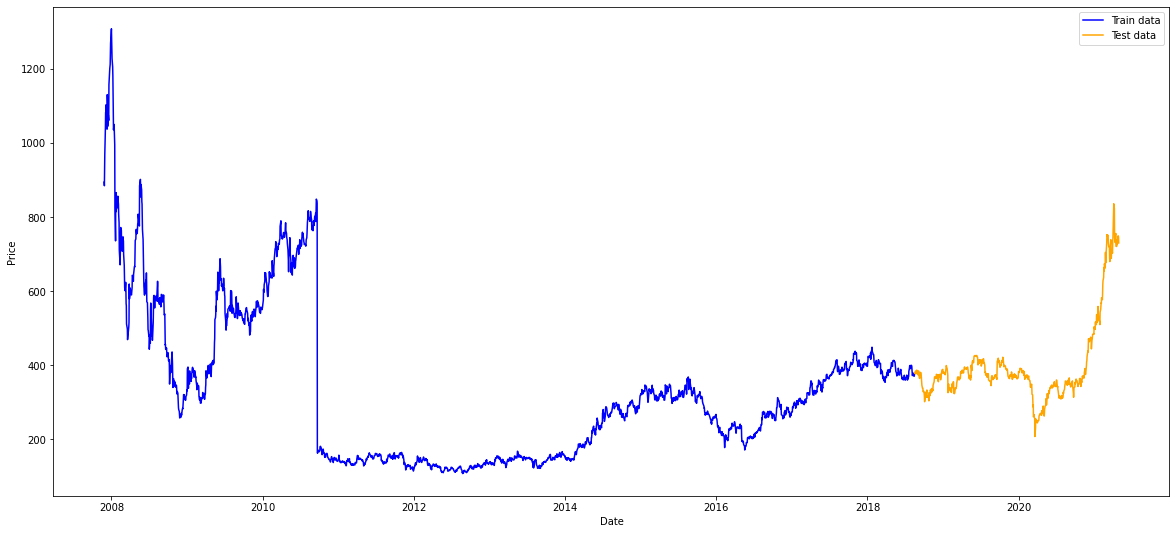

In [7]:
fig = plt.figure(figsize = (20,9))
ax = fig.add_subplot(1,1,1)

ax.plot(train_df['shifted'], color = 'blue')
ax.plot(test_df['shifted'], color = 'orange')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(['Train data', 'Test data'])

In [8]:
x_train = train_df.drop(labels = 'shifted', axis = 1)
y_train = train_df['shifted'].to_frame()

x_test = test_df.drop(labels = 'shifted', axis = 1)
y_test = test_df['shifted'].to_frame()

In [9]:
xscaler = MinMaxScaler(feature_range=(-1,1))
yscaler = MinMaxScaler(feature_range=(-1,1))
xscale = xscaler.fit(x_train)
yscale = yscaler.fit(y_train) 
x_train = xscale.transform(x_train)
y_train = yscale.transform(y_train)
x_test = xscale.transform(x_test)
y_test = yscale.transform(y_test)

In [10]:
x_train_series = []
y_train_series = []

x_test_series = []
y_test_series = []

for i in range(len(x_train) - 20):
  x_train_series.append(x_train[i:i+20,:])
  y_train_series.append(y_train[i+20])

for k in range(len(x_test) - 20):
  x_test_series.append(x_test[k:k+20,:])
  y_test_series.append(y_test[k+20])

In [11]:
x_train = np.array(x_train_series)
y_train = np.array(y_train_series)
x_test = np.array(x_test_series)
y_test = np.array(y_test_series)

In [12]:
list(np.shape(x_train))

[2636, 20, 5]

In [15]:
model = Sequential()
model.add(GRU(units = 64, return_sequences = True, input_shape = [20, 5]))
model.add(Dropout(0.2))
model.add(GRU(units = 64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 20, 64)            13632     
                                                                 
 dropout_2 (Dropout)         (None, 20, 64)            0         
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 38,657
Trainable params: 38,657
Non-trainable params: 0
_________________________________________________________________


In [16]:
fit = model.fit(x_train, y_train, epochs = 40, validation_split = 0.2, batch_size = 32, shuffle = False)

Epoch 1/40
66/66 [==============================] - 7s 38ms/step - loss: 0.0223 - val_loss: 0.0012
Epoch 2/40
66/66 [==============================] - 2s 24ms/step - loss: 0.0101 - val_loss: 8.7481e-04
Epoch 3/40
66/66 [==============================] - 2s 25ms/step - loss: 0.0091 - val_loss: 5.3808e-04
Epoch 4/40
66/66 [==============================] - 2s 25ms/step - loss: 0.0083 - val_loss: 3.6291e-04
Epoch 5/40
66/66 [==============================] - 2s 24ms/step - loss: 0.0082 - val_loss: 4.6841e-04
Epoch 6/40
66/66 [==============================] - 2s 24ms/step - loss: 0.0068 - val_loss: 4.6677e-04
Epoch 7/40
66/66 [==============================] - 2s 24ms/step - loss: 0.0078 - val_loss: 4.1465e-04
Epoch 8/40
66/66 [==============================] - 2s 24ms/step - loss: 0.0069 - val_loss: 3.9139e-04
Epoch 9/40
66/66 [==============================] - 2s 24ms/step - loss: 0.0065 - val_loss: 4.8923e-04
Epoch 10/40
66/66 [==============================] - 2s 24ms/step - loss: 0.0

In [17]:
y_test = yscaler.inverse_transform(y_test)
y_train = yscaler.inverse_transform(y_train)

In [18]:
pred = model.predict(x_test)
pred = yscaler.inverse_transform(pred)

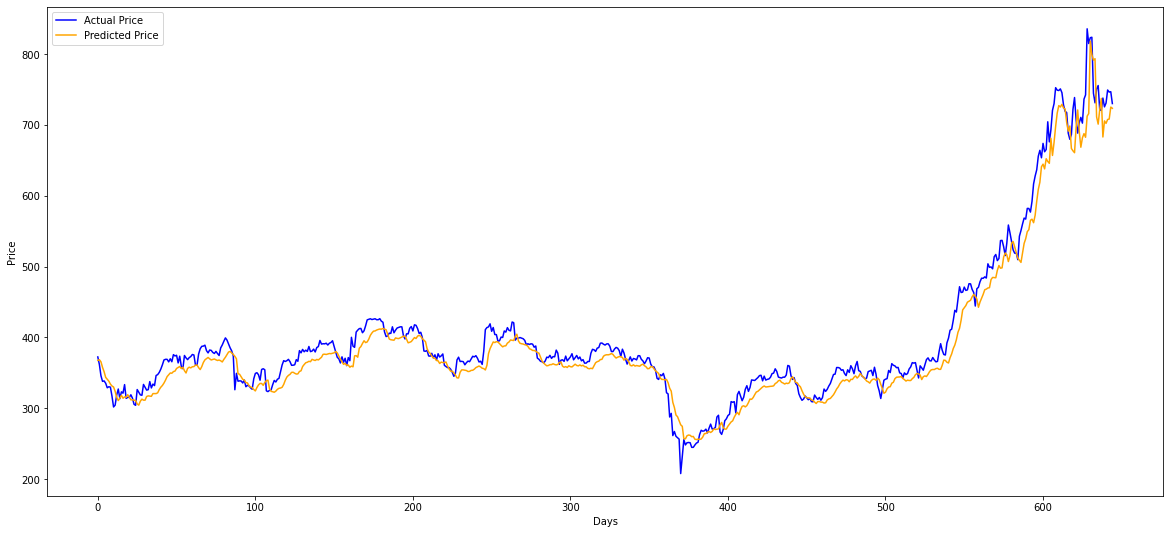

In [19]:
fig1 = plt.figure(figsize = (20,9))
ax1 = fig1.add_subplot(1,1,1)

ax1.plot(y_test, color = 'blue')
ax1.plot(pred, color = 'orange')
ax1.set_xlabel('Days')
ax1.set_ylabel('Price')
ax1.legend(['Actual Price', 'Predicted Price'])

In [20]:
print("Metrics")
print("-----------")
print("R2 Score: {}".format(r2_score(y_test, pred)))
print("MAE: {}".format(mean_absolute_error(y_test, pred)))
print("RMSE:{}".format(mean_squared_error(y_test, pred)))

Metrics
-----------
R2 Score: 0.9628808255904235
MAE: 16.273758407711053
RMSE:444.42607466603715


Method followed: https://towardsdatascience.com/bitcoin-bonanza-2cb208026bbd